In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os.path 
from os import listdir
import os, sys

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize


In [3]:
import numpy as np
import math as m
import csv

In [4]:
import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [215]:
#this uploads the file and assigns each column of data into a list designated by wavelength, intensity, current, and Bfield

f = open("/Users/kellygarcia/Google Drive/Test/Port1 1.6kW 25sccm 4.0mT Reverse 2017-08-20 no avg.txt", "r")
reader = csv.reader(f, delimiter='\n')
result = np.array(list(reader))

wavelength = []
intensity = []
current = []
magnetic_field = []

for i in range(0, len(result)):
    p = result[i]
    dat = p[0].split()
    w = float(dat[0])
    i = float(dat[1])
    c = float(dat[2])
    m = float(dat[3])
    wavelength.append(w)
    intensity.append(i)   
    current.append(c)
    magnetic_field.append(m)
print len(wavelength)/3648 #this number tells us over how large our B-field scan was 


f.close()

8


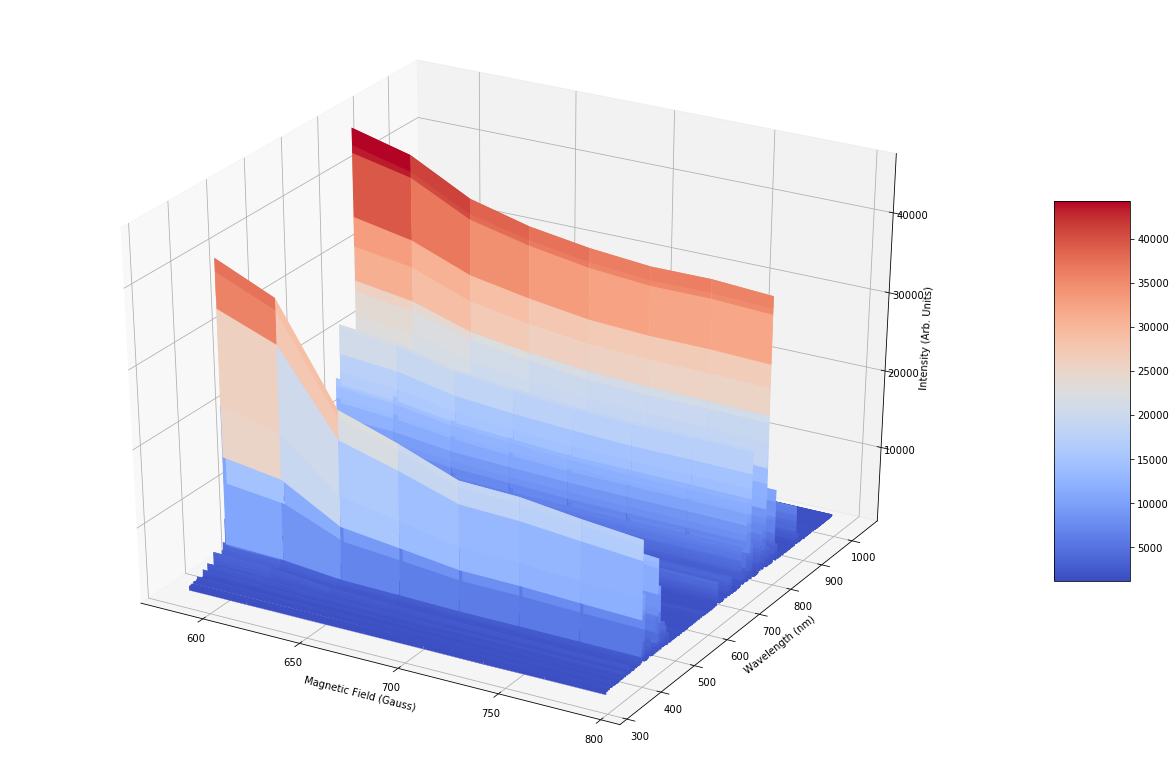

In [216]:
#let's make a 3D plot using matplotlib inline (if you have python 3, you may choose to use notebook rather than inline)

fig = plt.figure(figsize=(22, 14))
ax = fig.gca(projection='3d')

#Since each spectra file contains 3648 data points, we will make a list of len(wavelength)/3648 lists (the number above)
#these are nested lists
new_wavelength = [wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)]
new_intensity = [intensity[i:i+3648] for i in range(0, len(intensity), 3648)]
new_magnetic_field = [magnetic_field[i:i+3648] for i in range(0, len(intensity), 3648)]


#we are assigning the nested lists above to X,Y,Z and making them into arrays to plot
X = np.array(new_magnetic_field)
Y = np.array(new_wavelength)
Z = np.array(new_intensity)

#let's plot the surface!
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,  rstride=1, cstride=1)

#this is a colorbar from the color map we just used to plot our surface
fig.colorbar(surf, shrink=0.5, aspect=5)

#labels!
ax.set_ylabel('Wavelength (nm)')
ax.set_xlabel('Magnetic Field (Gauss)') 
ax.set_zlabel('Intensity (Arb. Units)')

plt.show()


In [217]:
#this is a check I use to make sure we are using to make sure there is a range of magnetic field
#this takes the first element in the list that comprise the nested list
#we also use len(ew) to make sure this number matches the number produced in the first line of code
ew = []
for i in range(0, len(new_magnetic_field)):
    ew.append(new_magnetic_field[i][0])
    
ew, len(ew)

([793.9, 763.75, 733.6, 703.45, 673.3, 643.15, 613.0, 582.85], 8)

In [218]:
#let's get fancy now and use plotly!
#we will use the nested list format to graph the coordinates under the Surface function
trace1 = go.Surface(x=(new_wavelength),
                   y=(new_magnetic_field),
                   z=(new_intensity))

#This assigns the layout and structure for our plot.
layout = go.Layout(title = f.name[37:80],
                    scene = dict(
                    xaxis = dict(
                        title = 'Wavelength (nm)'),
                    yaxis = dict(
                        title = 'Magnetic Field (Amps)'),
                    zaxis = dict(
                        title = 'Intensity'),),
                    width=700,
                    margin=dict(
                    r=20, l=10
                    )
                  )
#voila! The figure
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

#feel free to change as you please :)